# Seam Carving Implementation Comparison
This notebook compares the performance of different seam carving implementations:
- Sequential (CPU)
- OpenMP (CPU parallel)
- CUDA (GPU)
- MPI (Distributed)

We'll analyze the execution times recorded in results_json and visualize the comparison.

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Load results from all JSON files
results_dir = 'result_json'
implementations = ['sequential', 'omp', 'cuda', 'mpi']
all_results = []

for impl in implementations:
    json_file = os.path.join(results_dir, f'{impl}_results.json')
    with open(json_file, 'r') as f:
        data = json.load(f)
        # Add implementation name to each result
        for result in data:
            result['Implementation'] = impl
        all_results.extend(data)

# Convert to DataFrame
df = pd.DataFrame(all_results)

In [3]:
# Get unique implementations and image widths
implementations = df['Implementation'].unique()
widths = sorted(df['Width'].unique())

# Create a color map for different implementations
colors = plt.cm.Set1(np.linspace(0, 1, len(implementations)))

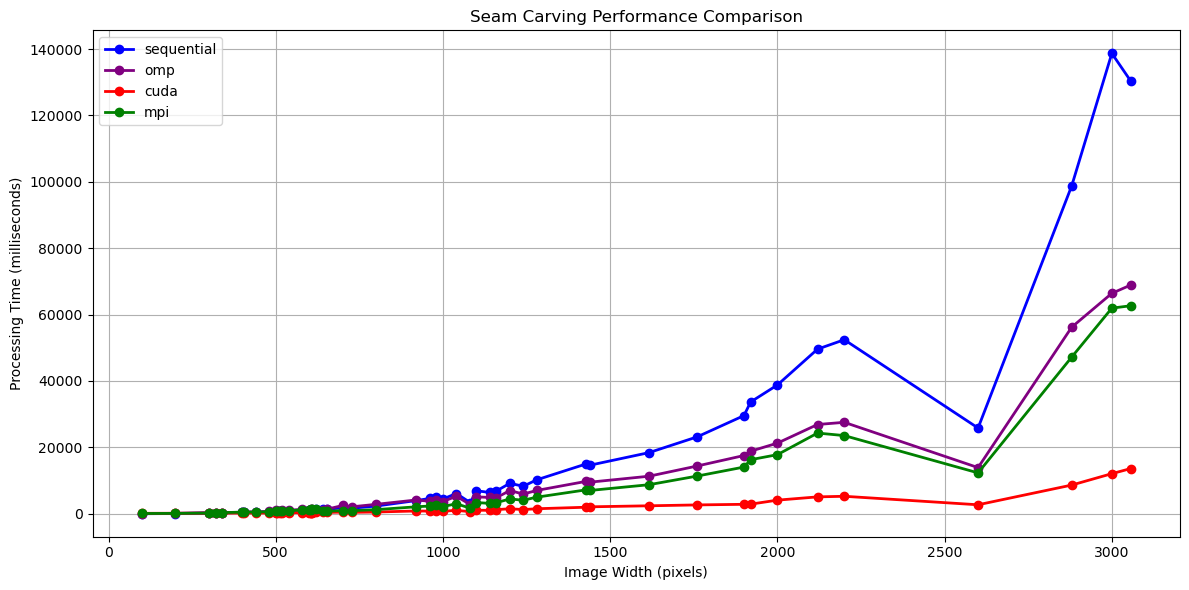

In [4]:
# Plot execution time comparison
plt.figure(figsize=(12, 6))

# Define colors for each implementation
colors = {
    'sequential': 'blue',
    'omp': 'purple', 
    'cuda': 'red',
    'mpi': 'green'
}

for impl in implementations:
    impl_data = df[df['Implementation'] == impl]
    # Convert seconds to milliseconds
    time_ms = impl_data['Average Time (s)'] * 1000
    plt.plot(impl_data['Width'], time_ms,
             'o-', color=colors[impl], label=impl, linewidth=2)

plt.title('Seam Carving Performance Comparison')
plt.xlabel('Image Width (pixels)')
plt.ylabel('Processing Time (milliseconds)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

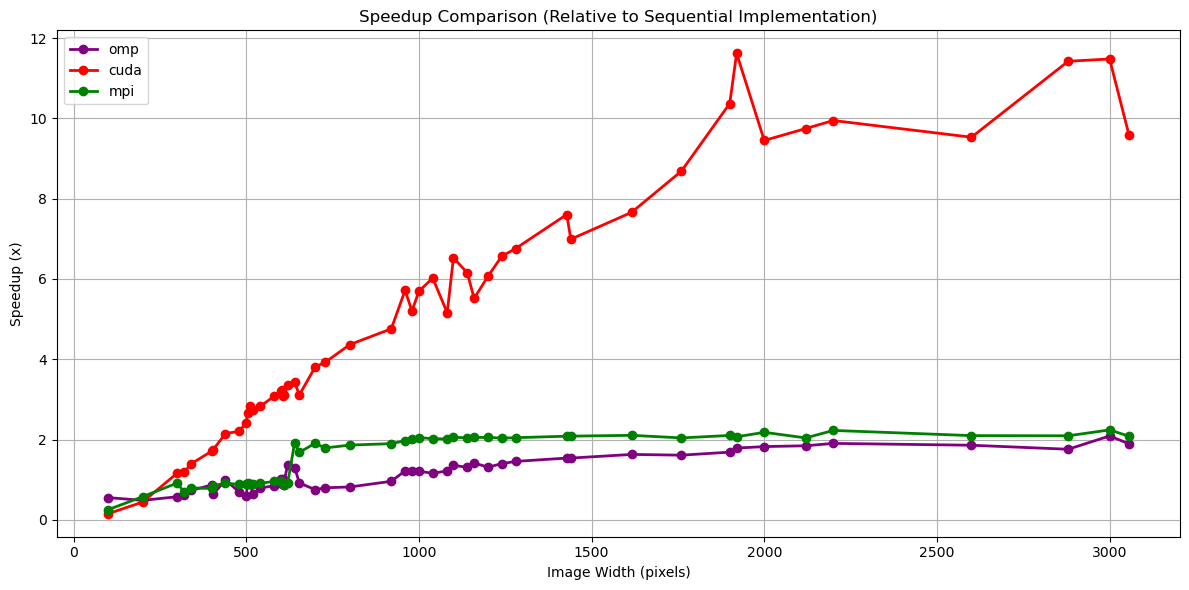

In [5]:
# Plot speedup comparison
plt.figure(figsize=(12, 6))

# Calculate speedup relative to sequential implementation
seq_times = df[df['Implementation'] == 'sequential']['Average Time (s)'].values
for impl in implementations:
    if impl != 'sequential':  # Skip sequential implementation
        impl_data = df[df['Implementation'] == impl]
        speedup = seq_times / impl_data['Average Time (s)'].values
        plt.plot(impl_data['Width'], speedup, 
                'o-', color=colors[impl], label=impl, linewidth=2)

plt.title('Speedup Comparison (Relative to Sequential Implementation)')
plt.xlabel('Image Width (pixels)')
plt.ylabel('Speedup (x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Calculate and display summary statistics
print("Performance Summary:")
for impl in implementations:
    impl_data = df[df['Implementation'] == impl]
    avg_time = np.mean(impl_data['Average Time (s)'])
    std_time = np.std(impl_data['Average Time (s)'])
    print(f"\n{impl.upper()} Implementation:")
    print(f"Average Time: {avg_time:.2f} ± {std_time:.2f} seconds")
    print(f"Min Time: {np.min(impl_data['Average Time (s)']):.2f} seconds")
    print(f"Max Time: {np.max(impl_data['Average Time (s)']):.2f} seconds")

Performance Summary:

SEQUENTIAL Implementation:
Average Time: 15.34 ± 30.17 seconds
Min Time: 0.02 seconds
Max Time: 138.70 seconds

OMP Implementation:
Average Time: 8.95 ± 15.47 seconds
Min Time: 0.04 seconds
Max Time: 68.88 seconds

CUDA Implementation:
Average Time: 1.74 ± 2.78 seconds
Min Time: 0.14 seconds
Max Time: 13.60 seconds

MPI Implementation:
Average Time: 7.43 ± 13.97 seconds
Min Time: 0.08 seconds
Max Time: 62.66 seconds
